In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
"""
get_dummies(data, prefix = None, prefix_sep = '_', dummy_na = False, columns = None, sparse = False, drop_first = False, 
            dtype = None)
            
params:
data: Data of which we want to get dummy indicators.
      array-like, Series, or DataFrame
prefix: String to append DataFrame column names.
        Pass a list with length equal to column names.
prefix_sep: default '_'. used while appending a prefix.
dummy_na: Add a column to indicate NaNs, if false NaN's ignored.
columns: column names in df to be encoded
drop_first: Whether to remove first categorical level
dtype: Data type for new colums.

returns: DataFrame object
"""


dummy_df = pd.get_dummies(data, columns = ["ocean_proximity"], prefix = ["Type_is"], prefix_sep = ' ')
print(dummy_df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [4]:
import datashader as ds
import datashader.transfer_functions as tf
from colorcet import fire

In [5]:
from datashader.utils import lnglat_to_meters as webm

y_range_min = data["latitude"].quantile(0.01)
y_range_max = data["latitude"].quantile(0.99)
x_range_min = data["longitude"].quantile(0.01)
x_range_max = data["longitude"].quantile(0.99)

sw = webm(x_range_min, y_range_min)
ne = webm(x_range_max, y_range_max)
california = zip(sw, ne)

In [6]:
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9
from IPython.core.display import HTML, display

In [7]:
plot_width = int(500)
plot_height = int(500)
background = "black"
export = partial(export_image, background = background, export_path = "export")
cm = partial(colormap_select, reverse = (background != "black"))

In [8]:
display(HTML("<style>.container {width: 100% !important:}</style>"))

In [9]:
cvs = ds.Canvas(plot_width, plot_height, *california)
agg = cvs.points(data, 'latitude', 'longitude', ds.mean('median_house_value'))
img = tf.shade(agg, cmap=['lightblue', 'darkblue'], how='log')

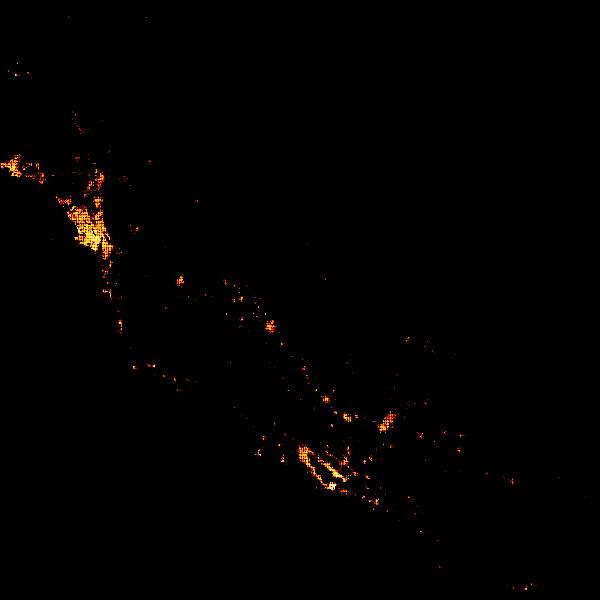

In [10]:
agg = ds.Canvas().points(data, 'latitude', 'longitude')
tf.set_background(tf.shade(agg, cmap=fire),"black")

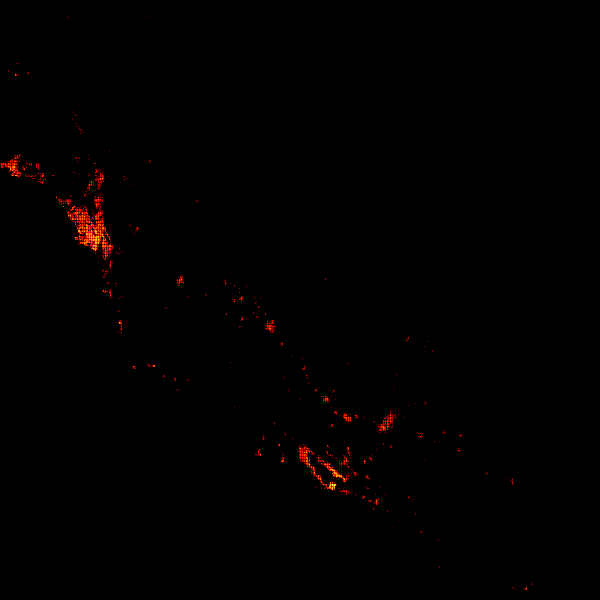

In [11]:
export(tf.shade(agg, cmap = cm(fire, 0,2), how = "log") ,"california_data")

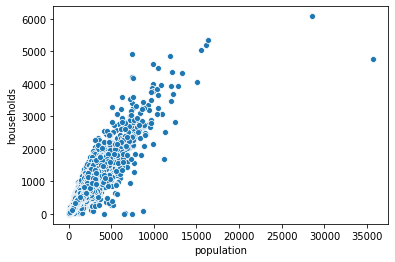

In [12]:
sns.scatterplot(x = "population", y = "households", data = dummy_df)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Creating object of Linear Regressin class

"""
Parameters: (all are optional)
1. fit_intercept: True (default) / False
                   Whether to calculate intercept for model
                    If false, no intercept used in calculations
2. normalize: True / False(True)
                If True, X normalized before regression by subtracting mean and dividing by I2-norm
3. copy_X: True (default) / False
            If True X copied, else overwrwhichtten
4. n_jobs: int / None (default)
            Number of jobs to use for computation

"""
regressor = LinearRegression()

In [15]:
train_x = np.array(dummy_df["population"])
train_y = np.array(dummy_df["households"])

In [16]:
print(train_x.shape)
print(train_y.shape)

(20640,)
(20640,)


In [17]:
"""
We can see that the data fields are currently 1D.

The input data to which the data should be fitted must be a 2D data no 1D.
"""

train_x = train_x.reshape(-1, 1)
train_y = train_y.reshape(-1, 1)

In [18]:
train_x.shape

(20640, 1)

In [19]:
train_y.shape

(20640, 1)

In [20]:
"""
The fit method fits the linear model.

Parameters:
1. X: array, independent variable
2. Y: array, dependent variable
3. sample_weight: array_like of shape, default = None
"""

regressor.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
"""
predict(self, X)

Parameters:
1. X: array_like/sparse matrix
"""
y_pred = regressor.predict(train_x)

In [22]:
y_pred.shape

(20640, 1)

In [23]:
"""
For sns.lineplot, the y variable should be 1D not 2D.
Thus we flatten the y_pred to make it 1D.
"""

print("Initial shape of y_pred: " + str(y_pred.shape))
y_pred = y_pred.flatten()
print("Final (required) shape of y_pred: " + str(y_pred.shape))

Initial shape of y_pred: (20640, 1)
Final (required) shape of y_pred: (20640,)


In [ ]:
sns.scatterplot(x = "population", y = "households",data = dummy_df)

sns.lineplot(x = dummy_df["population"], y = y_pred)